#### Theola Lois Keren R

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [2]:
demographics=pd.read_csv("user_demographics.csv")
demographics

,User_ID,Gender,Age,Occupation
0,1000001,F,0-17,10
1,1000002,M,55+,16
2,1000003,M,26-35,15
3,1000004,M,46-50,7
4,1000005,M,26-35,20
...,...,...,...,...
5886,1004588,F,26-35,4
5887,1004871,M,18-25,12
5888,1004113,M,36-45,17
5889,1005391,M,26-35,7


In [3]:
purchase_details=pd.read_csv("User_product_purchase_details_p2.csv")
purchase_details

,User_ID,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,C,2,0,20,NaN,NaN,365


In [4]:
demographics.shape

(5891, 4)

In [5]:
purchase_details.shape

(550068, 9)

In [6]:
demographics.columns

Index(['User_ID', 'Gender', 'Age', 'Occupation'], dtype='object')

In [13]:
purchase_details.columns

Index(['User_ID', 'Product_ID', 'City_Category', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase'],
      dtype='object')

In [15]:
demographics.isnull().sum()

User_ID       0
Gender        0
Age           0
Occupation    0
dtype: int64

In [17]:
purchase_details.isnull().sum()

User_ID                            0
Product_ID                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [19]:
df= pd.merge(purchase_details, demographics, on='User_ID', how='inner')

In [21]:
df

,User_ID,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender,Age,Occupation
0,1000001,P00069042,A,2,0,3,NaN,NaN,8370,F,0-17,10
1,1000001,P00248942,A,2,0,1,6.0,14.0,15200,F,0-17,10
2,1000001,P00087842,A,2,0,12,NaN,NaN,1422,F,0-17,10
3,1000001,P00085442,A,2,0,12,14.0,NaN,1057,F,0-17,10
4,1000002,P00285442,C,4+,0,8,NaN,NaN,7969,M,55+,16
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,B,1,1,20,NaN,NaN,368,M,51-55,13
550064,1006035,P00375436,C,3,0,20,NaN,NaN,371,F,26-35,1
550065,1006036,P00375436,B,4+,1,20,NaN,NaN,137,F,26-35,15
550066,1006038,P00375436,C,2,0,20,NaN,NaN,365,F,55+,1


In [23]:
df.shape

(550068, 12)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   City_Category               550068 non-null  object 
 3   Stay_In_Current_City_Years  550068 non-null  object 
 4   Marital_Status              550068 non-null  int64  
 5   Product_Category_1          550068 non-null  int64  
 6   Product_Category_2          376430 non-null  float64
 7   Product_Category_3          166821 non-null  float64
 8   Purchase                    550068 non-null  int64  
 9   Gender                      550068 non-null  object 
 10  Age                         550068 non-null  object 
 11  Occupation                  550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [27]:
df.dtypes

User_ID                         int64
Product_ID                     object
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
Gender                         object
Age                            object
Occupation                      int64
dtype: object

In [29]:
df.columns

Index(['User_ID', 'Product_ID', 'City_Category', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase', 'Gender', 'Age', 'Occupation'],
      dtype='object')

In [31]:
missing_values=df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage)

User_ID                        0.000000
Product_ID                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
dtype: float64


In [33]:
df.describe().T  #Descriptive statistics for numerical data

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0


### Target variable -purchase amount- ranges from 12 to 23,961, with a mean purchase of ₹9,264.
### The data appears to be skewed toward higher values as the 75th percentile (₹12,054) is much larger than the median (₹8,047)
### This shows a long tail with high purchases
### The high standard deviation of ₹5,023 suggests a wide variation in purchase amounts

In [36]:
df.describe(include='object').T   #Descriptive statistics for categorical data

,count,unique,top,freq
Product_ID,550068,3631,P00265242,1880
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Gender,550068,2,M,414259
Age,550068,7,26-35,219587


### Most Purchased Product P00265242 - was bought 1,880 times
### Category B has the highest frequency, with 231,173 purchases
### The most frequent Stay in currect city is 1 year, with 193,821 users- indicates that a large number of customers 
### are relatively new to their cities
### Strong male-dominated customer base - 414,259 or 75% of the total
### Majority of the customers fall into the young adult demographic - 26-35 age range, 219,587 users - 40% of Total

In [39]:
df.nunique()

User_ID                        5891
Product_ID                     3631
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
Gender                            2
Age                               7
Occupation                       21
dtype: int64

In [41]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [43]:
df.duplicated().sum()

0

In [45]:
# Filling missing values in Product Category 2 and 3 columns with 0 (assuming missing means no purchase)
# merged_data['Product_Category_1'] = merged_data['Product_Category_1'].fillna(0)
df['Product_Category_2'] = df['Product_Category_2'].fillna(0)
df['Product_Category_3'] = df['Product_Category_3'].fillna(0)
df.head(10)

,User_ID,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender,Age,Occupation
0,1000001,P00069042,A,2,0,3,0.0,0.0,8370,F,0-17,10
1,1000001,P00248942,A,2,0,1,6.0,14.0,15200,F,0-17,10
2,1000001,P00087842,A,2,0,12,0.0,0.0,1422,F,0-17,10
3,1000001,P00085442,A,2,0,12,14.0,0.0,1057,F,0-17,10
4,1000002,P00285442,C,4+,0,8,0.0,0.0,7969,M,55+,16
5,1000003,P00193542,A,3,0,1,2.0,0.0,15227,M,26-35,15
6,1000004,P00184942,B,2,1,1,8.0,17.0,19215,M,46-50,7
7,1000004,P00346142,B,2,1,1,15.0,0.0,15854,M,46-50,7
8,1000004,P0097242,B,2,1,1,16.0,0.0,15686,M,46-50,7
9,1000005,P00274942,A,1,1,8,0.0,0.0,7871,M,26-35,20


In [47]:
df.dtypes

User_ID                         int64
Product_ID                     object
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
Gender                         object
Age                            object
Occupation                      int64
dtype: object

In [49]:
# Converting relevant columns to 'int' after handling missing values
df['Product_Category_2'] = df['Product_Category_2'].astype('int')
df['Product_Category_3'] = df['Product_Category_3'].astype('int')

In [51]:
df.dtypes

User_ID                        int64
Product_ID                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int32
Product_Category_3             int32
Purchase                       int64
Gender                        object
Age                           object
Occupation                     int64
dtype: object

In [53]:
df.isna().sum()

User_ID                       0
Product_ID                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
Gender                        0
Age                           0
Occupation                    0
dtype: int64

In [55]:
purchase_stats = df['Purchase'].describe()
purchase_stats

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

### Most customers spend between ₹5,823 and ₹12,054, based on the IQR
### A few high-end purchases (outliers above ₹23,000) are inflating the average purchase value
### The median purchase amount of ₹8,047 indicates that the average is skewed by higher spenders

In [57]:
#To avoid leading or trailing spaces in the column names
df.columns = df.columns.str.strip()
df.head(5)

,User_ID,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender,Age,Occupation
0,1000001,P00069042,A,2,0,3,0,0,8370,F,0-17,10
1,1000001,P00248942,A,2,0,1,6,14,15200,F,0-17,10
2,1000001,P00087842,A,2,0,12,0,0,1422,F,0-17,10
3,1000001,P00085442,A,2,0,12,14,0,1057,F,0-17,10
4,1000002,P00285442,C,4+,0,8,0,0,7969,M,55+,16


In [59]:
# Handle Stay_In_Current_City_Years column - Replace '+' with an empty string
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','').astype(int)

In [61]:
df.head(10)

,User_ID,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender,Age,Occupation
0,1000001,P00069042,A,2,0,3,0,0,8370,F,0-17,10
1,1000001,P00248942,A,2,0,1,6,14,15200,F,0-17,10
2,1000001,P00087842,A,2,0,12,0,0,1422,F,0-17,10
3,1000001,P00085442,A,2,0,12,14,0,1057,F,0-17,10
4,1000002,P00285442,C,4,0,8,0,0,7969,M,55+,16
5,1000003,P00193542,A,3,0,1,2,0,15227,M,26-35,15
6,1000004,P00184942,B,2,1,1,8,17,19215,M,46-50,7
7,1000004,P00346142,B,2,1,1,15,0,15854,M,46-50,7
8,1000004,P0097242,B,2,1,1,16,0,15686,M,46-50,7
9,1000005,P00274942,A,1,1,8,0,0,7871,M,26-35,20


In [63]:
# Convert Gender and Age to categorical numerics using Label Encoding
#le = LabelEncoder()

# Encoding Gender
#merged_data['Gender'] = le.fit_transform(merged_data['Gender'])

# Encoding Age (this may have values like '0-17', '18-25', etc.)
#merged_data['Age'] = le.fit_transform(merged_data['Age'])

# Encoding City_Category
#merged_data['City_Category'] = le.fit_transform(merged_data['City_Category'])

# Checking the first few rows after encoding
#merged_data.head()
# Label Encoding Gender and City_Category

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # 0: Female, 1: Male
df['City_Category'] = le.fit_transform(df['City_Category'])  # 0: A, 1: B, 2: C
df['Age'] = le.fit_transform(df['Age'])
df.head(10)

,User_ID,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender,Age,Occupation
0,1000001,P00069042,0,2,0,3,0,0,8370,0,0,10
1,1000001,P00248942,0,2,0,1,6,14,15200,0,0,10
2,1000001,P00087842,0,2,0,12,0,0,1422,0,0,10
3,1000001,P00085442,0,2,0,12,14,0,1057,0,0,10
4,1000002,P00285442,2,4,0,8,0,0,7969,1,6,16
5,1000003,P00193542,0,3,0,1,2,0,15227,1,2,15
6,1000004,P00184942,1,2,1,1,8,17,19215,1,4,7
7,1000004,P00346142,1,2,1,1,15,0,15854,1,4,7
8,1000004,P0097242,1,2,1,1,16,0,15686,1,4,7
9,1000005,P00274942,0,1,1,8,0,0,7871,1,2,20


In [62]:
# Label Encoding Gender and City_Category
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # 0: Female, 1: Male
df['City_Category'] = le.fit_transform(df['City_Category'])  # 0: A, 1: B, 2: C

# Label encoding 'Age'
age_mapping = {'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6}
df['Age'] = df['Age'].map(age_mapping)

df.head(10)

,User_ID,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender,Age,Occupation
0,1000001,P00069042,0,2,0,3,0,0,8370,0,0,10
1,1000001,P00248942,0,2,0,1,6,14,15200,0,0,10
2,1000001,P00087842,0,2,0,12,0,0,1422,0,0,10
3,1000001,P00085442,0,2,0,12,14,0,1057,0,0,10
4,1000002,P00285442,2,4,0,8,0,0,7969,1,6,16
5,1000003,P00193542,0,3,0,1,2,0,15227,1,2,15
6,1000004,P00184942,1,2,1,1,8,17,19215,1,4,7
7,1000004,P00346142,1,2,1,1,15,0,15854,1,4,7
8,1000004,P0097242,1,2,1,1,16,0,15686,1,4,7
9,1000005,P00274942,0,1,1,8,0,0,7871,1,2,20


In [65]:
df.nunique()

User_ID                        5891
Product_ID                     3631
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
Gender                            2
Age                               7
Occupation                       21
dtype: int64

### TOTAL PRODUCT CATEGORY SPEND

In [69]:
# Creating a new feature for total spend across product categories
df['Total_Product_Category_Spend'] = df['Product_Category_1'] + df['Product_Category_2'] + df['Product_Category_3']
df['Total_Product_Category_Spend']

0          3
1         21
2         12
3         26
4          8
          ..
550063    20
550064    20
550065    20
550066    20
550067    20
Name: Total_Product_Category_Spend, Length: 550068, dtype: int64

### TOTAL PRODUCT CATEGORIES

In [71]:
# Count how many product categories each customer purchased from
df['Total_Product_Categories'] = df[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].notna().sum(axis=1)
df['Total_Product_Categories']

0         3
1         3
2         3
3         3
4         3
         ..
550063    3
550064    3
550065    3
550066    3
550067    3
Name: Total_Product_Categories, Length: 550068, dtype: int64

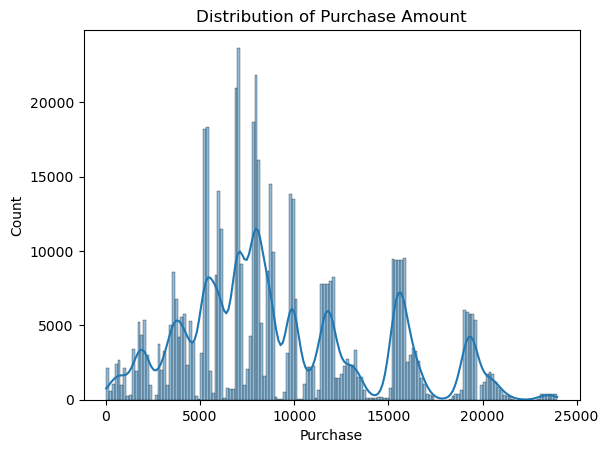

In [73]:
# Univariate Analysis: Distribution of Purchase amounts
#Histogram for numeric feature
sns.histplot(df['Purchase'], kde=True)
plt.title('Distribution of Purchase Amount')
plt.show()

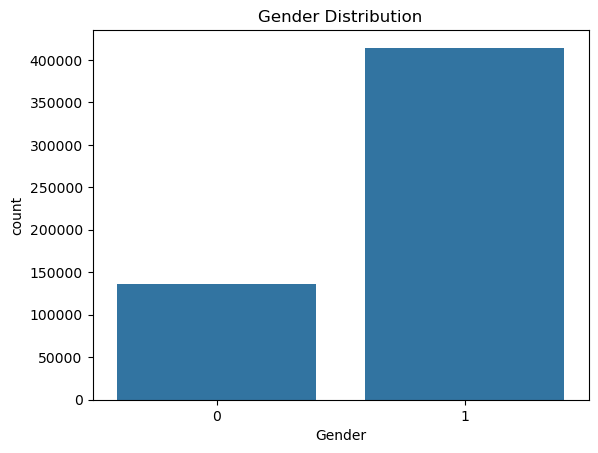

In [75]:
# Count plot for Gender distribution
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()

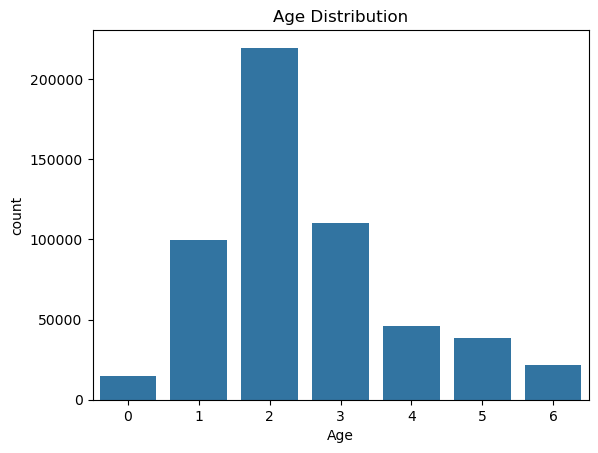

In [76]:
# Count plot for Age distribution
sns.countplot(data=df, x='Age')
plt.title('Age Distribution')
plt.show()

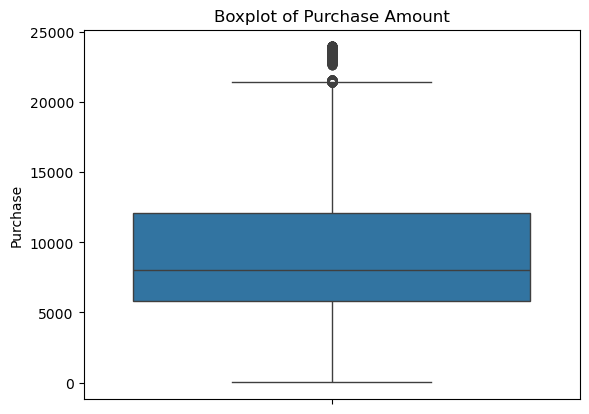

In [78]:
sns.boxplot(df['Purchase'])
plt.title('Boxplot of Purchase Amount')
plt.show()

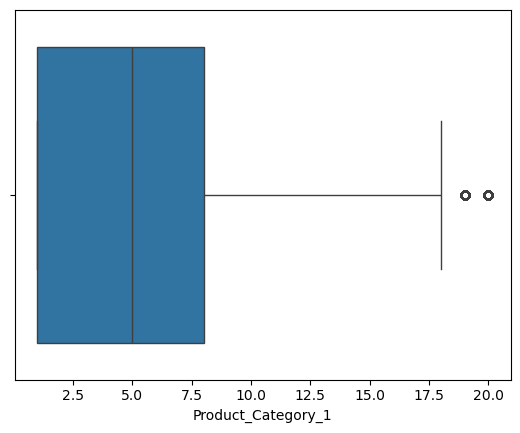

In [79]:
# Outlier detection using boxplot for Product category 1 column
sns.boxplot(x=df['Product_Category_1'])
plt.show()

Age
0    8933.464640
1    9169.663606
2    9252.690633
3    9331.350695
4    9208.625697
5    9534.808031
6    9336.280459
Name: Purchase, dtype: float64


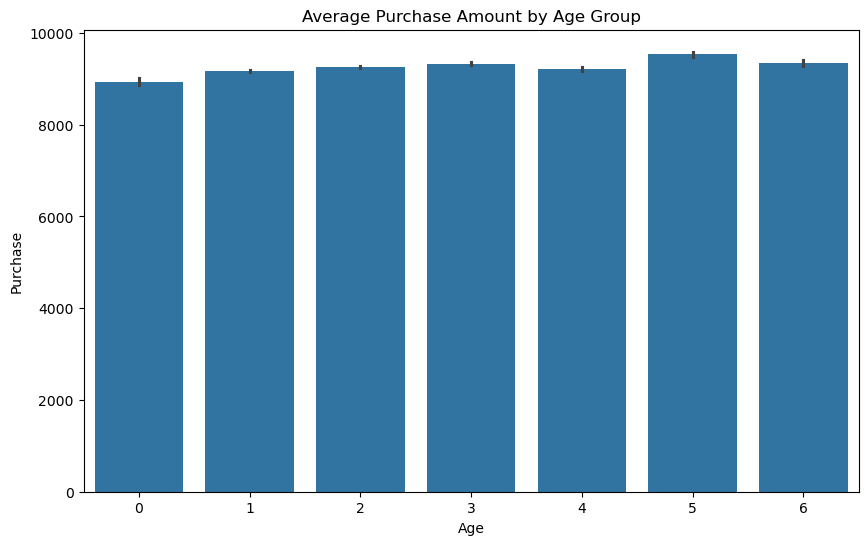

In [81]:
# Average purchase amount by Age group
age_purchase = df.groupby('Age')['Purchase'].mean()
print(age_purchase)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Purchase', data=df)
plt.title('Average Purchase Amount by Age Group')
plt.show()

City_Category
0    8911.939216
1    9151.300563
2    9719.920993
Name: Purchase, dtype: float64


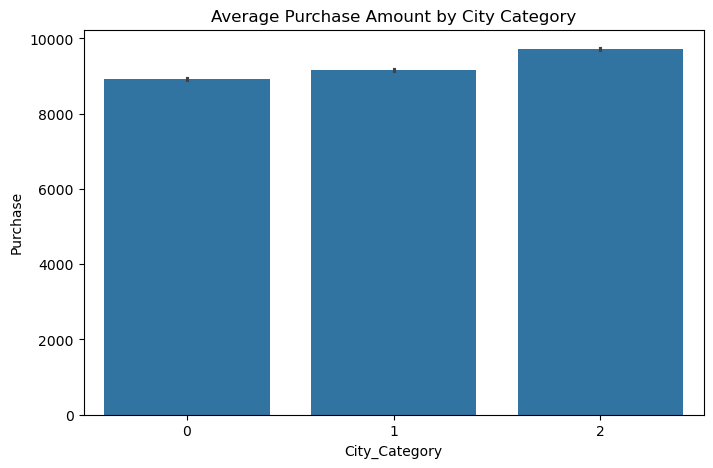

In [82]:
# Average purchase amount by City Category
city_purchase = df.groupby('City_Category')['Purchase'].mean()
print(city_purchase)

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x='City_Category', y='Purchase', data=df)
plt.title('Average Purchase Amount by City Category')
plt.show()

Occupation
0     9124.428588
1     8953.193270
2     8952.481683
3     9178.593088
4     9213.980251
5     9333.149298
6     9256.535691
7     9425.728223
8     9532.592497
9     8637.743761
10    8959.355375
11    9213.845848
12    9796.640239
13    9306.351061
14    9500.702772
15    9778.891163
16    9394.464349
17    9821.478236
18    9169.655844
19    8710.627231
20    8836.494905
Name: Purchase, dtype: float64


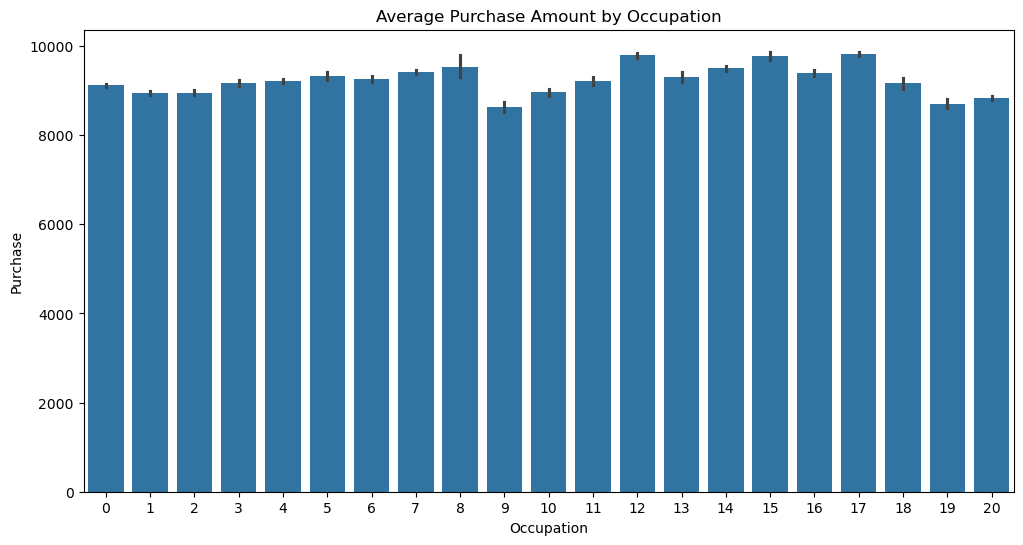

In [84]:
# Average purchase amount by occupation
occupation_purchase = df.groupby('Occupation')['Purchase'].mean()
print(occupation_purchase)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='Occupation', y='Purchase', data=df)
plt.title('Average Purchase Amount by Occupation')
plt.show()

Gender
0    8734.565765
1    9437.526040
Name: Purchase, dtype: float64


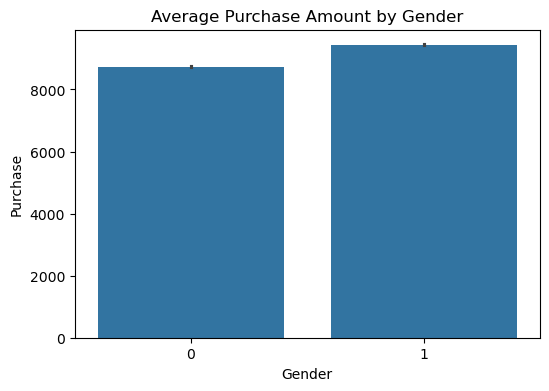

In [85]:
# Gender wise Purchase behavior
gender_purchase = df.groupby('Gender')['Purchase'].mean()
print(gender_purchase)

plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='Purchase', data=df)
plt.title('Average Purchase Amount by Gender')
plt.show()

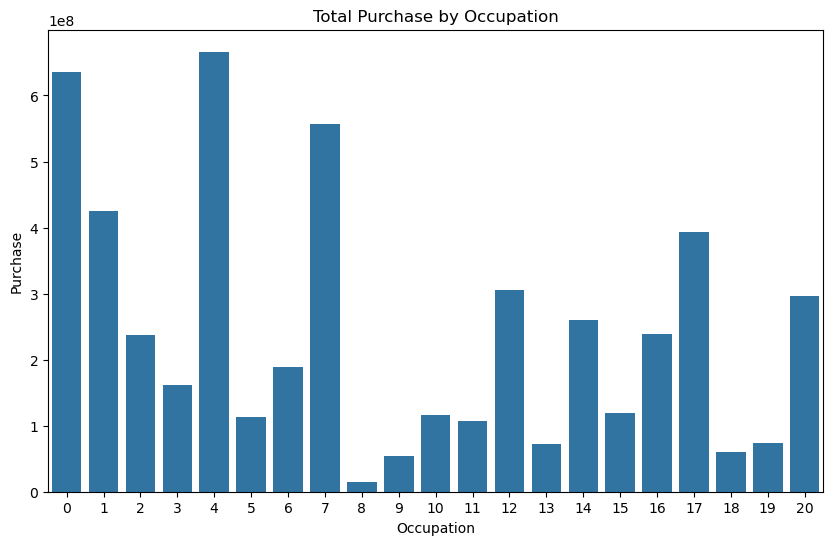

In [86]:
# Total Purchase by Occupation
occupation_purchase = df.groupby('Occupation')['Purchase'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Occupation', y='Purchase', data=occupation_purchase)
plt.title('Total Purchase by Occupation')
plt.show()

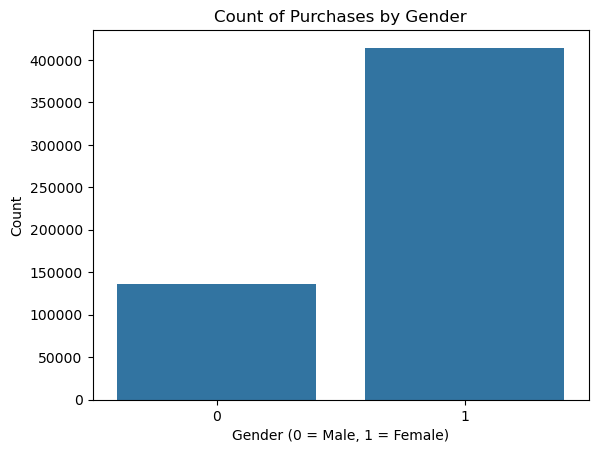

In [88]:
# Count Plot for Gender
sns.countplot(data=df, x='Gender')
plt.title('Count of Purchases by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.show()

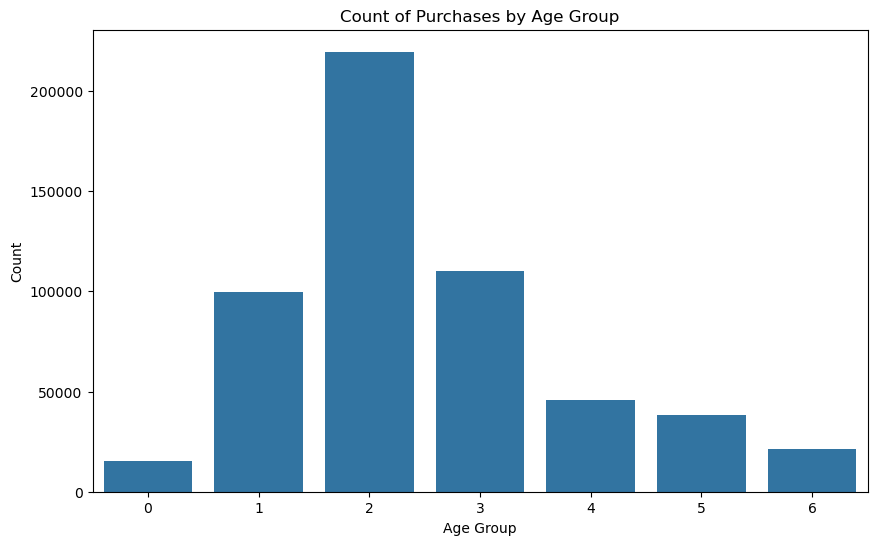

In [89]:
# Count Plot for Age Groups
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age')
plt.title('Count of Purchases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

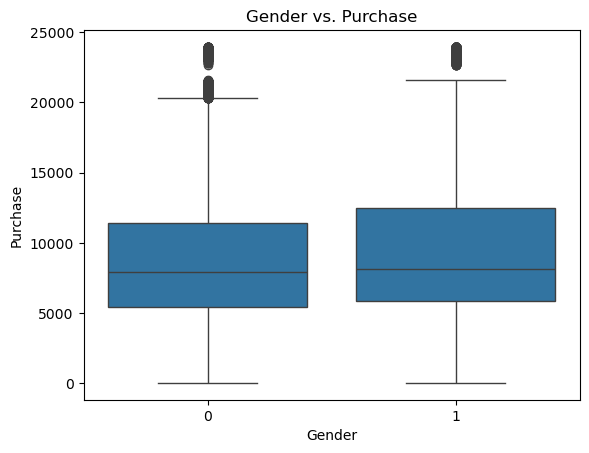

In [90]:
# BIVARIATE ANALYSIS
# Boxplot for Gender vs. Purchase
sns.boxplot(data=df, x='Gender', y='Purchase')
plt.title('Gender vs. Purchase')
plt.show()

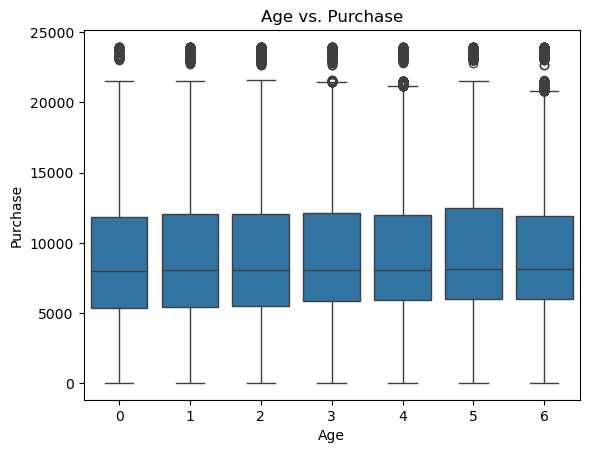

In [91]:
# Boxplot for Age vs. Purchase
sns.boxplot(data=df, x='Age', y='Purchase')
plt.title('Age vs. Purchase')
plt.show()

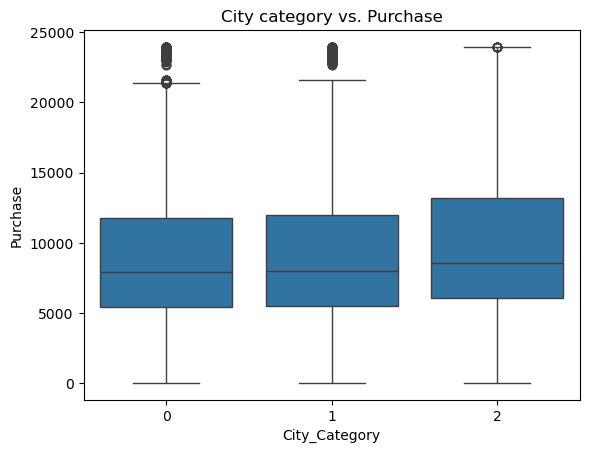

In [92]:
# Boxplot for City category vs. Purchase
sns.boxplot(data=df, x='City_Category', y='Purchase')
plt.title('City category vs. Purchase')
plt.show()

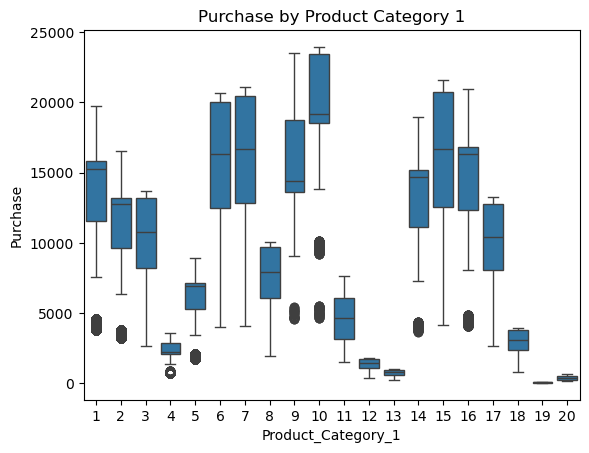

In [93]:
# Purchase amount by Product Category
sns.boxplot(x='Product_Category_1', y='Purchase', data=df)
plt.title('Purchase by Product Category 1')
plt.show()

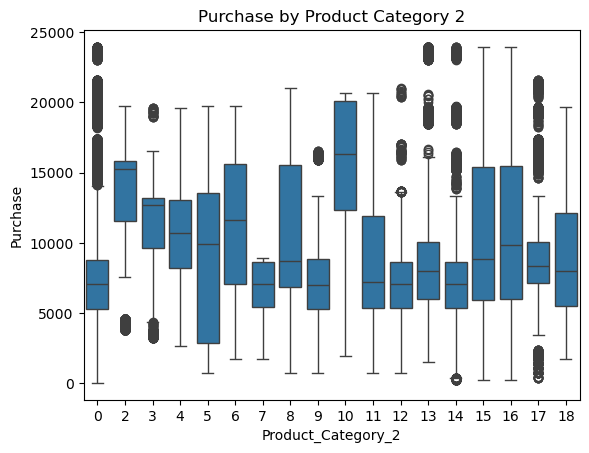

In [94]:
# Purchase amount by Product Category
sns.boxplot(x='Product_Category_2', y='Purchase', data=df)
plt.title('Purchase by Product Category 2')
plt.show()

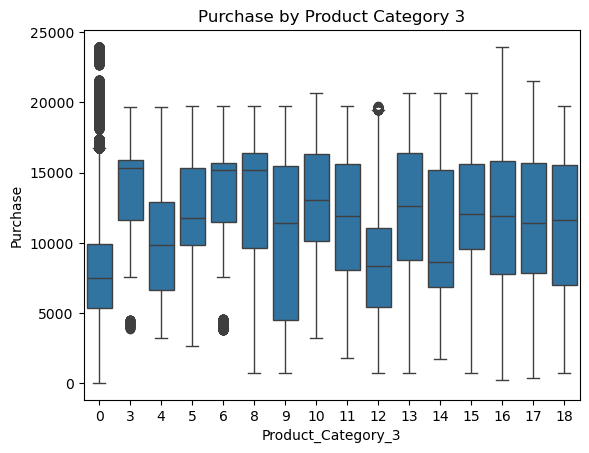

In [95]:
# Purchase amount by Product Category
sns.boxplot(x='Product_Category_3', y='Purchase', data=df)
plt.title('Purchase by Product Category 3')
plt.show()

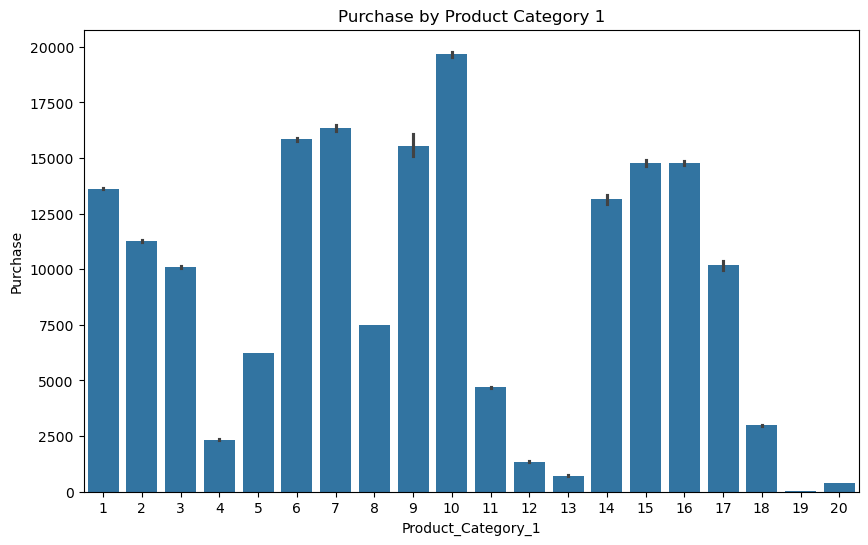

In [96]:
# Purchase by Product_Category_1
plt.figure(figsize=(10,6))
sns.barplot(x='Product_Category_1', y='Purchase', data=df)
plt.title('Purchase by Product Category 1')
plt.show()

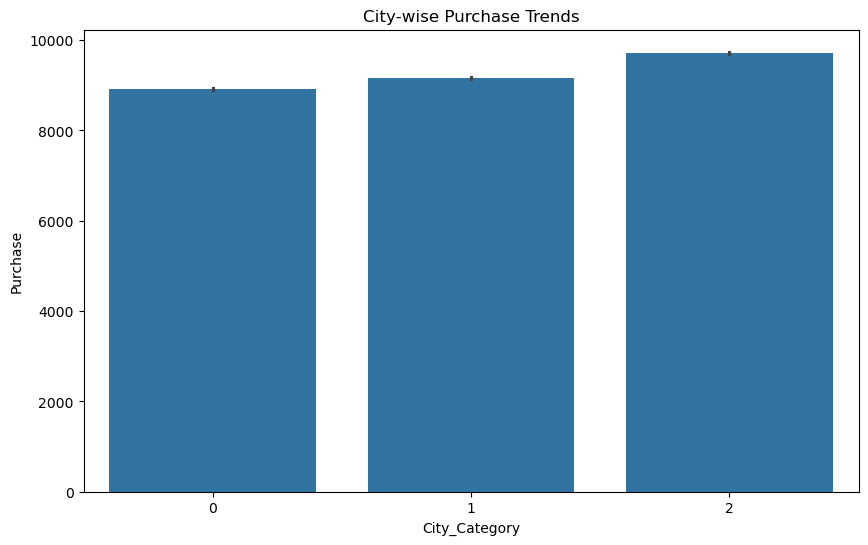

In [97]:
# City-wise Purchase Trends
plt.figure(figsize=(10,6))
sns.barplot(x='City_Category', y='Purchase', data=df)
plt.title('City-wise Purchase Trends')
plt.show()

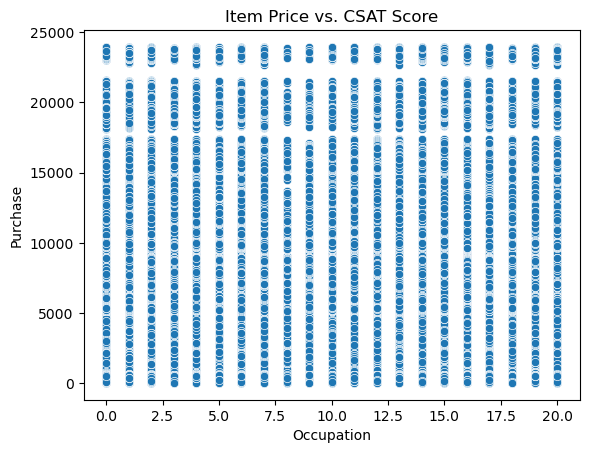

In [98]:
#BIVARIATE ANALYSIS
# Scatter plot to see the relationship between 'Item_price' and 'CSAT Score'
sns.scatterplot(x='Occupation', y='Purchase', data=df)
plt.title('Item Price vs. CSAT Score')
plt.show()

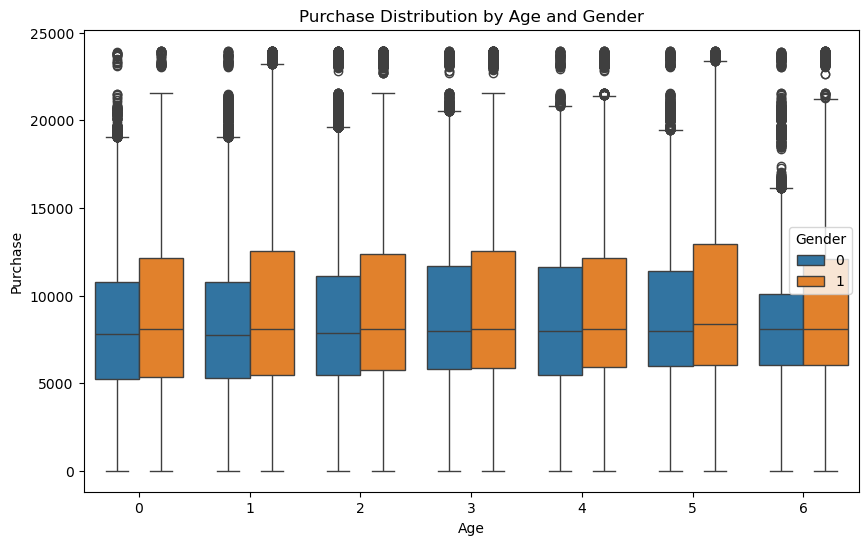

In [99]:
#MULTI VARIATE ANALYSIS
# Purchase Distribution by Age Group and Gender
plt.figure(figsize=(10,6))
sns.boxplot(x='Age', y='Purchase', hue='Gender', data=df)
plt.title('Purchase Distribution by Age and Gender')
plt.show()

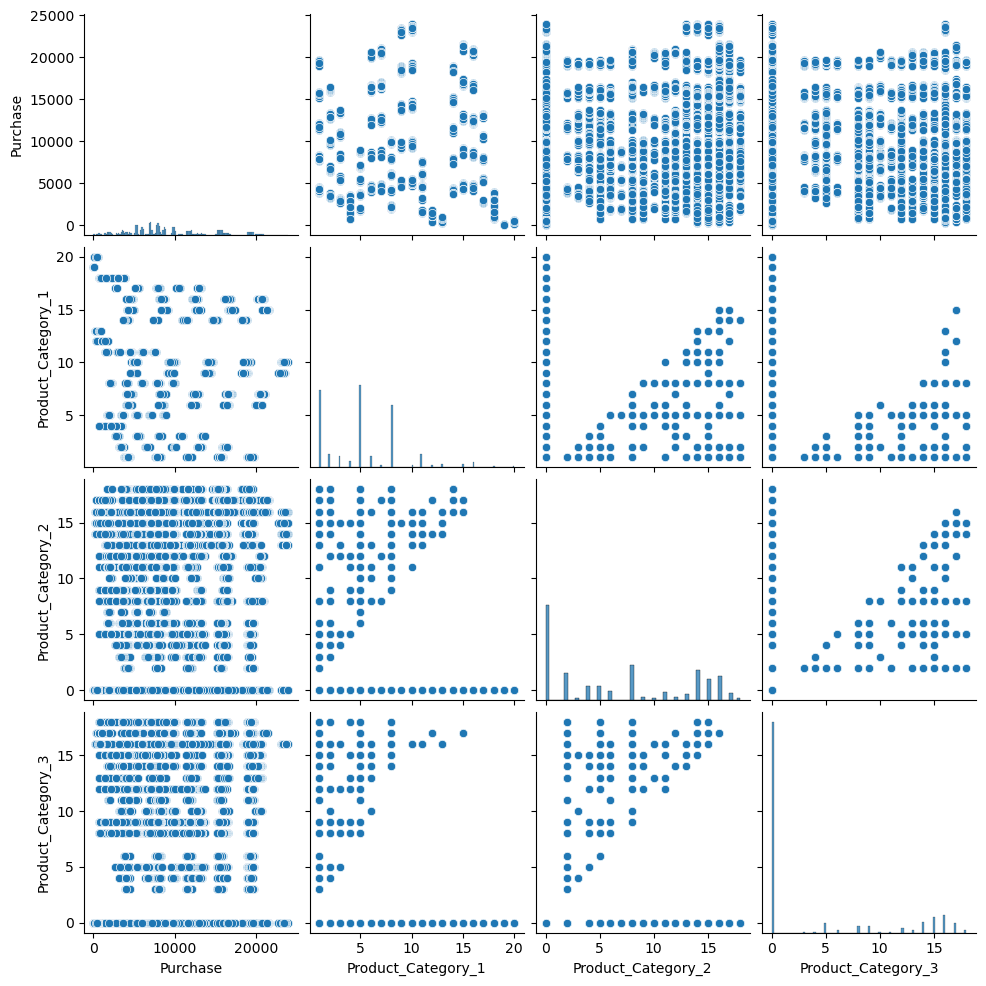

In [100]:
# Multi-variate Analysis
sns.pairplot(df, vars=['Purchase', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3'])
plt.show()

### TOTAL SPENDING AND MAXIMUM SPENDING IN EACH CATEGORY

In [120]:
# Product_Category_1
total_max_C1 = df.groupby('Product_Category_1')['Purchase'].agg(['sum', 'max']).reset_index()
# Rename columns for clarity
total_max_C1.columns = ['Product_Category_1', 'Total_Spending', 'Max_Spending']

# Display the result
print("Total and Maximum Spending for Product Category 1:")
print(total_max_C1)

# Product_Category_2
total_max_C2 = df.groupby('Product_Category_2')['Purchase'].agg(['sum', 'max']).reset_index()
total_max_C2.columns = ['Product_Category_2', 'Total_Spending', 'Max_Spending']

print("\nTotal and Maximum Spending for Product Category 2:")
print(total_max_C2)

# Product_Category_3
total_max_C3 = df.groupby('Product_Category_3')['Purchase'].agg(['sum', 'max']).reset_index()
total_max_C3.columns = ['Product_Category_3', 'Total_Spending', 'Max_Spending']

print("\nTotal and Maximum Spending for Product Category 3:")
print(total_max_C3)

Total and Maximum Spending for Product Category 1:
    Product_Category_1  Total_Spending  Max_Spending
0                    1      1910013754         19708
1                    2       268516186         16504
2                    3       204084713         13717
3                    4        27380488          3556
4                    5       941835229          8907
5                    6       324150302         20690
6                    7        60896731         21080
7                    8       854318799         10082
8                    9         6370324         23531
9                   10       100837301         23961
10                  11       113791115          7654
11                  12         5331844          1778
12                  13         4008601           962
13                  14        20014696         18931
14                  15        92969042         21569
15                  16       145120612         20971
16                  17         5878699         1

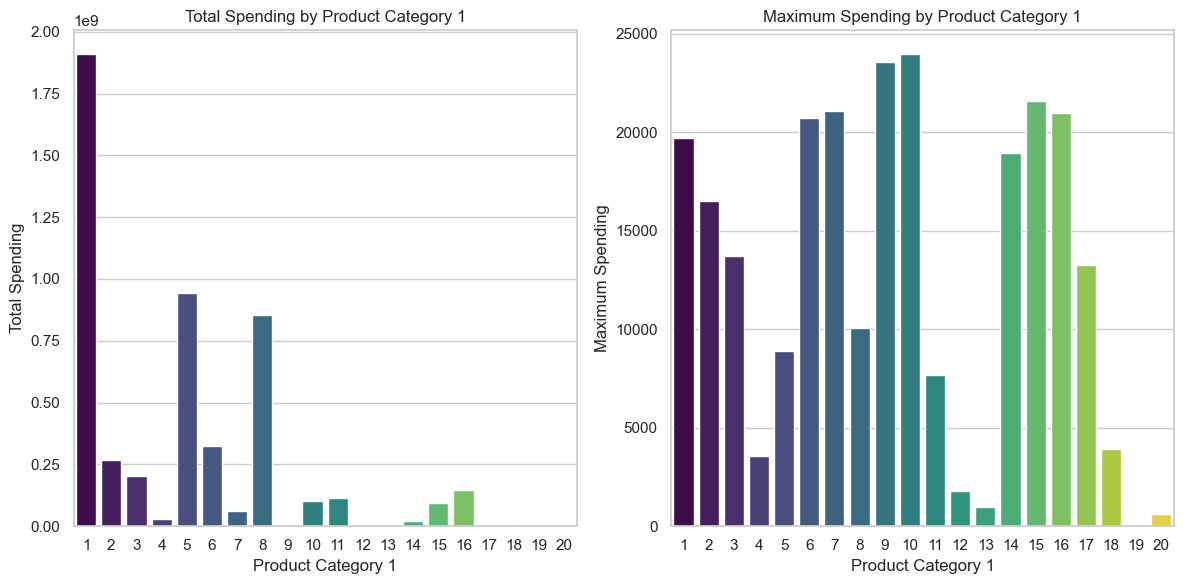

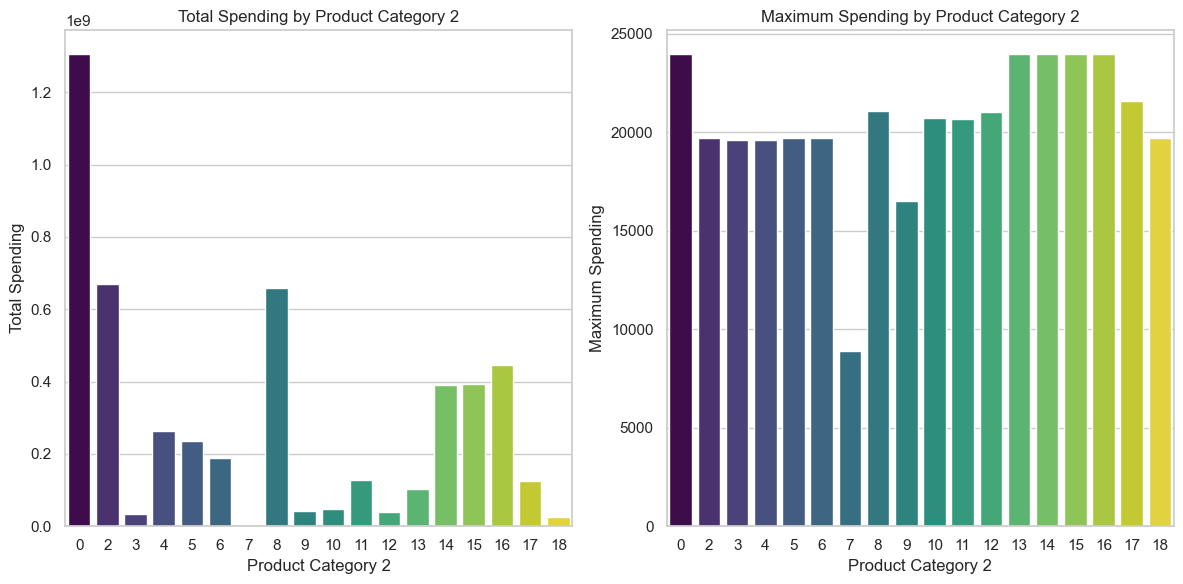

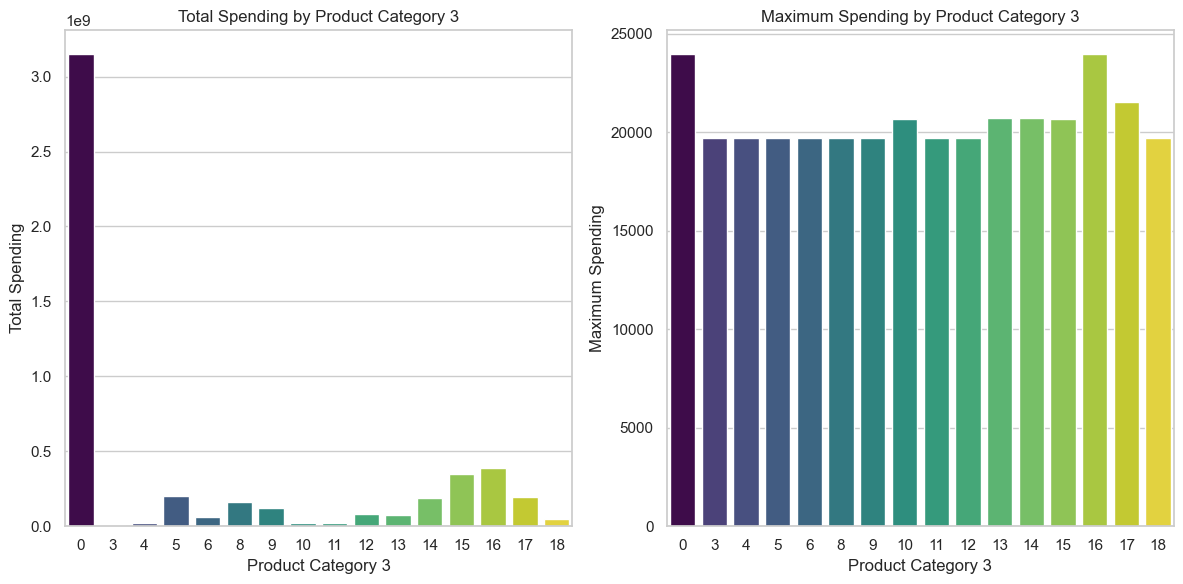

In [122]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Visualization for Product Category 1
plt.figure(figsize=(12, 6))

# Create a bar plot for total spending
plt.subplot(1, 2, 1)
sns.barplot(x='Product_Category_1', y='Total_Spending', hue='Product_Category_1', data=total_max_C1, palette='viridis', legend=False)
plt.title('Total Spending by Product Category 1')
plt.xlabel('Product Category 1')
plt.ylabel('Total Spending')

# Create a bar plot for maximum spending
plt.subplot(1, 2, 2)
sns.barplot(x='Product_Category_1', y='Max_Spending', hue='Product_Category_1', data=total_max_C1, palette='viridis', legend=False)
plt.title('Maximum Spending by Product Category 1')
plt.xlabel('Product Category 1')
plt.ylabel('Maximum Spending')

plt.tight_layout()
plt.show()

# Visualization for Product Category 2
plt.figure(figsize=(12, 6))

# Create a bar plot for total spending
plt.subplot(1, 2, 1)
sns.barplot(x='Product_Category_2', y='Total_Spending', hue='Product_Category_2', data=total_max_C2, palette='viridis', legend=False)
plt.title('Total Spending by Product Category 2')
plt.xlabel('Product Category 2')
plt.ylabel('Total Spending')

# Create a bar plot for maximum spending
plt.subplot(1, 2, 2)
sns.barplot(x='Product_Category_2', y='Max_Spending', hue='Product_Category_2', data=total_max_C2, palette='viridis', legend=False)
plt.title('Maximum Spending by Product Category 2')
plt.xlabel('Product Category 2')
plt.ylabel('Maximum Spending')

plt.tight_layout()
plt.show()

# Visualization for Product Category 3
plt.figure(figsize=(12, 6))

# Create a bar plot for total spending
plt.subplot(1, 2, 1)
sns.barplot(x='Product_Category_3', y='Total_Spending', hue='Product_Category_3', data=total_max_C3, palette='viridis', legend=False)
plt.title('Total Spending by Product Category 3')
plt.xlabel('Product Category 3')
plt.ylabel('Total Spending')

# Create a bar plot for maximum spending
plt.subplot(1, 2, 2)
sns.barplot(x='Product_Category_3', y='Max_Spending', hue='Product_Category_3', data=total_max_C3, palette='viridis', legend=False)
plt.title('Maximum Spending by Product Category 3')
plt.xlabel('Product Category 3')
plt.ylabel('Maximum Spending')

plt.tight_layout()
plt.show()

### OUTLIER DETECTION AND REMOVAL

In [124]:
# Outlier detection using IQR
# Numerical columns where we expect outliers (Purchase and Product Categories)
numerical_columns = ['Purchase', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']

def detect_and_remove_outliers(df, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile range
        
        # Define bounds for detecting outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Display the outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"Outliers in {col}: {len(outliers)}")
        print(outliers)
        
        # Remove outliers from the dataframe
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df  # Return the cleaned DataFrame

# Display shape before cleaning
print(f"Dataset shape before removing outliers: {df.shape}")

# Detect and remove outliers from the original DataFrame
df_cleaned = detect_and_remove_outliers(df.copy(), numerical_columns)  # Use a copy to preserve the original DataFrame

# Display shape after cleaning
print(f"Dataset shape after removing outliers: {df_cleaned.shape}")

Dataset shape before removing outliers: (550068, 14)
Outliers in Purchase: 2677
        User_ID Product_ID  City_Category  Stay_In_Current_City_Years  \
343     1000058  P00117642              1                           3   
375     1000062  P00119342              0                           1   
652     1000126  P00087042              1                           1   
736     1000139  P00159542              2                           2   
1041    1000175  P00052842              1                           1   
...         ...        ...            ...                         ...   
544488  1005815  P00116142              1                           1   
544704  1005847  P00085342              1                           2   
544743  1005852  P00202242              0                           0   
545663  1006002  P00116142              2                           1   
545787  1006018  P00052842              2                           3   

        Marital_Status  Product_Category_1 

### Outliers Detected:
### Purchase: 2677 outliers 
### Product_Category_1: 4153 outliers 
### Product_Category_2: No outliers
### Product_Category_3: No outliers

### DataFrame Shape:
### The original dataset shape was (550068, 12)
### After removing outliers, the cleaned dataset shape is (543238, 12) -A total of 6830 outliers were removed from the dataset

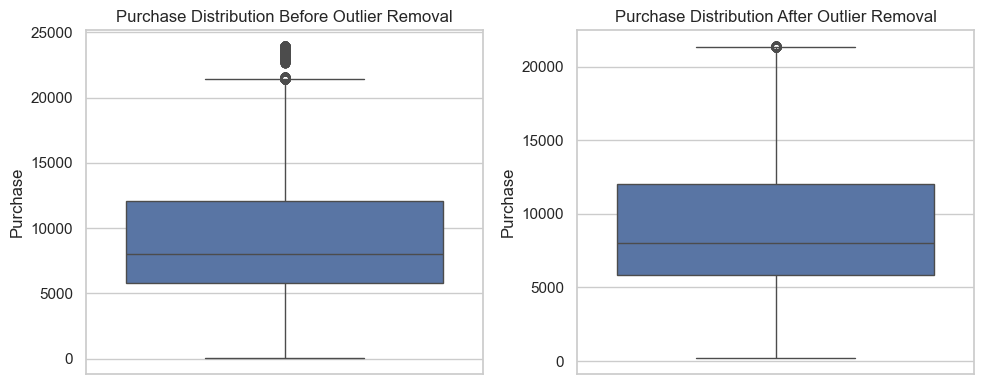

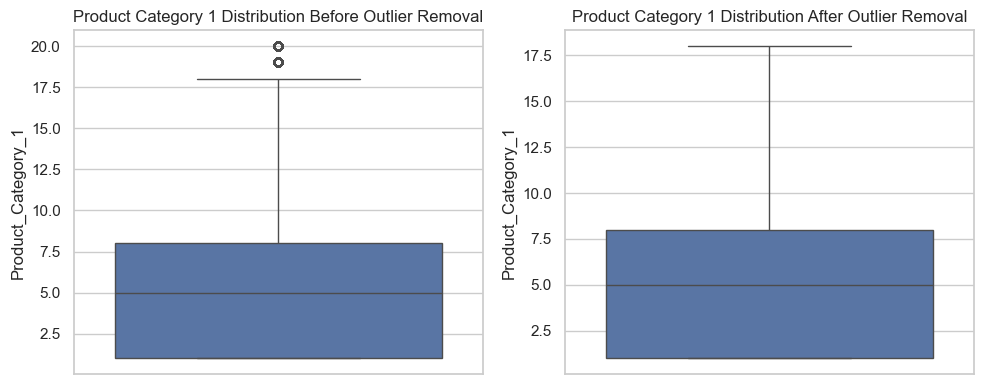

In [126]:
# Visualize before outlier removal
plt.figure(figsize=(10, 4))

# Boxplot for Purchase before removing outliers
plt.subplot(1, 2, 1)
sns.boxplot(data=df['Purchase'])
plt.title('Purchase Distribution Before Outlier Removal')

# Boxplot for Purchase after removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned['Purchase'])
plt.title('Purchase Distribution After Outlier Removal')

plt.tight_layout()
plt.show()

# Visualize for Product_Category_1 similarly
plt.figure(figsize=(10, 4))

# Boxplot for Product_Category_1 before removing outliers
plt.subplot(1, 2, 1)
sns.boxplot(data=df['Product_Category_1'])
plt.title('Product Category 1 Distribution Before Outlier Removal')

# Boxplot for Product_Category_1 after removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned['Product_Category_1'])
plt.title('Product Category 1 Distribution After Outlier Removal')

plt.tight_layout()
plt.show()

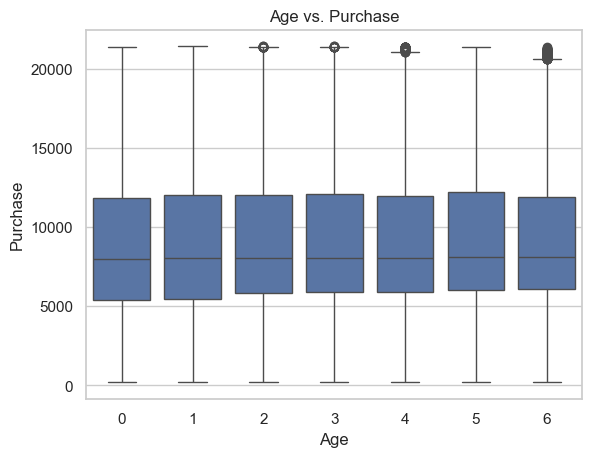

In [128]:
# Boxplot for Age vs. Purchase
sns.boxplot(data=df_cleaned, x='Age', y='Purchase')
plt.title('Age vs. Purchase')
plt.show()

In [130]:
# Create customer segments based on Purchase amounts (quartiles)
df_cleaned['Customer_Segment'] = pd.qcut(df_cleaned['Purchase'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Check distribution of Customer Segments
print(df_cleaned['Customer_Segment'].value_counts())

Customer_Segment
Medium       135853
Low          135849
High         135782
Very High    135754
Name: count, dtype: int64


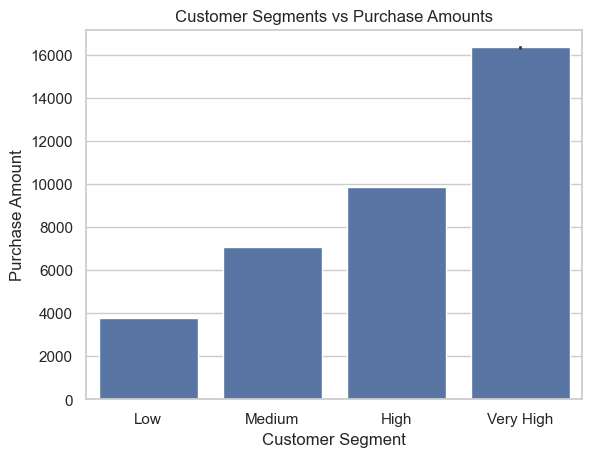

In [132]:
# Plot Customer Segment vs Purchase Amount  - This visualization shows the average Purchase amount for each customer segment.
sns.barplot(x='Customer_Segment', y='Purchase', data=df_cleaned)
plt.title('Customer Segments vs Purchase Amounts')
plt.xlabel('Customer Segment')
plt.ylabel('Purchase Amount')
plt.show()

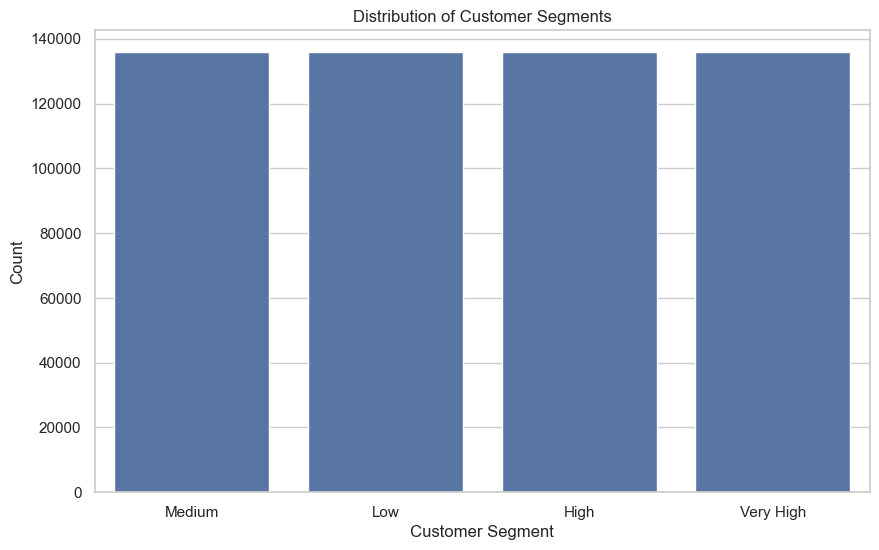

In [133]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer_Segment', data=df_cleaned, order=df_cleaned['Customer_Segment'].value_counts().index)
plt.title('Distribution of Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.show()

### DISCOUNT VOUCHER based on the spending data for different product categories using CUSTOMER SEGMENTS

In [135]:
print(df_cleaned.head())

# Create customer segments based on Purchase amounts (quartiles)
df['Customer_Segment'] = pd.qcut(df['Purchase'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Function to assign discount based on customer segment
def assign_discount(segment):
    if segment == 'Low':
        return '5-10%'
    elif segment == 'Medium':
        return '10-15%'
    elif segment == 'High':
        return '15-20%'
    elif segment == 'Very High':
        return '20%+'

# Assign discount offers to each customer based on their segment
df['Discount_Offer'] = df_cleaned['Customer_Segment'].apply(assign_discount)

# Check the updated DataFrame with discount offers
print(df[['User_ID', 'Purchase', 'Customer_Segment', 'Discount_Offer']])

   User_ID Product_ID  City_Category  Stay_In_Current_City_Years  \
0  1000001  P00069042              0                           2   
1  1000001  P00248942              0                           2   
2  1000001  P00087842              0                           2   
3  1000001  P00085442              0                           2   
4  1000002  P00285442              2                           4   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                   0                   0   
1               0                   1                   6                  14   
2               0                  12                   0                   0   
3               0                  12                  14                   0   
4               0                   8                   0                   0   

   Purchase  Gender  Age  Occupation  Total_Product_Category_Spend  \
0      8370       0    0          

In [136]:
df.head(5)

product_id = "P00069042"
product_details = df[df['Product_ID'] == product_id]
print(product_details)

        User_ID Product_ID  City_Category  Stay_In_Current_City_Years  \
0       1000001  P00069042              0                           2   
825     1000149  P00069042              1                           2   
3314    1000541  P00069042              2                           3   
4224    1000698  P00069042              0                           1   
5864    1000951  P00069042              1                           4   
...         ...        ...            ...                         ...   
539484  1005061  P00069042              2                           2   
540849  1005284  P00069042              2                           1   
543419  1005667  P00069042              1                           1   
544454  1005812  P00069042              0                           1   
545219  1005938  P00069042              2                           1   

        Marital_Status  Product_Category_1  Product_Category_2  \
0                    0                   3               

In [137]:
# Create a new feature 'Total_Product_Category_Spend' by summing up product category purchases
df_cleaned['Total_Product_Category_Spend'] = df_cleaned[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].sum(axis=1)

# Creating Another New Feature for Total Product Categories purchased
df_cleaned['Total_Product_Categories'] = df_cleaned[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].count(axis=1)

# Segmenting customers based on their total spending
df_cleaned['Customer_Segment'] = pd.qcut(df_cleaned['Total_Product_Category_Spend'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Checking the first few rows after feature engineering
#df_cleaned[['User_ID', 'Total_Product_Category_Spend', 'Customer_Segment']].head()

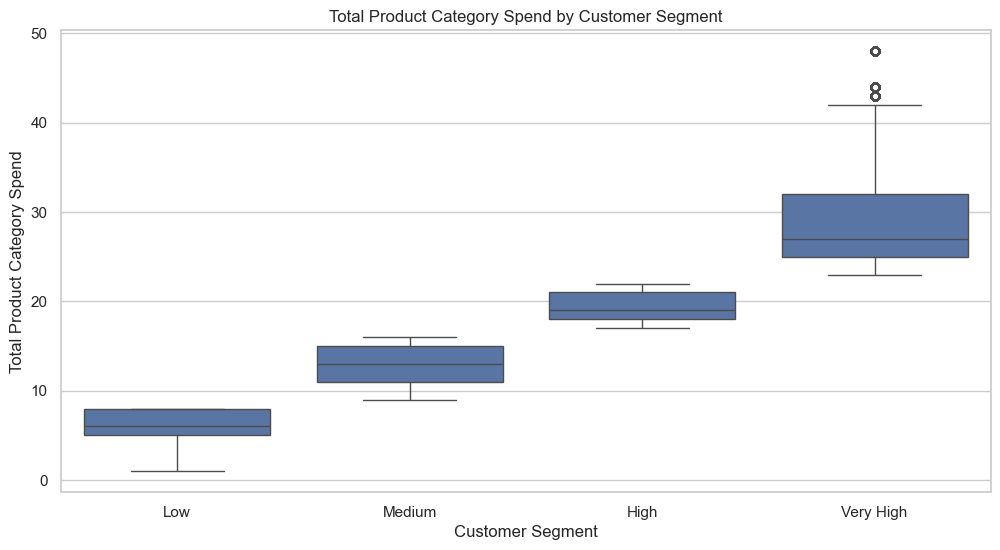

In [143]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Customer_Segment', y='Total_Product_Category_Spend', data=df_cleaned, legend=False)
plt.title('Total Product Category Spend by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Product Category Spend')
plt.show()

In [145]:
#Data scaling - Normalization
# Using Min-Max scaling for numerical columns like Purchase
#scaler = MinMaxScaler()
#merged_data_cleaned['Purchase_Scaled'] = scaler.fit_transform(merged_data_cleaned[['Purchase']])

### Z-score Normalization

In [148]:
# Z-score indicates how many standard deviations a data point is from the mean of the dataset
# Z-score of 0 means the data point is exactly at the mean
# A positive Z-score indicates the value is above the mean
# A negative Z-score indicates it is below the mean
# Z-score greater than 3 or less than -3 are often considered outliers.

# Initialize the StandardScaler
standard_scaler = StandardScaler()

# Apply Z-score normalization to the numerical columns
df_cleaned[numerical_columns] = standard_scaler.fit_transform(df_cleaned[numerical_columns])

# Display the transformed data
print("Data after Z-score Normalization:")
print(df_cleaned[numerical_columns].head())

Data after Z-score Normalization:
   Purchase  Product_Category_1  Product_Category_2  Product_Category_3
0 -0.182652           -0.607161           -1.089735           -0.618181
1  1.212651           -1.142077           -0.122461            1.617351
2 -1.602061            1.799959           -1.089735           -0.618181
3 -1.676626            1.799959            1.167237           -0.618181
4 -0.264572            0.730128           -1.089735           -0.618181


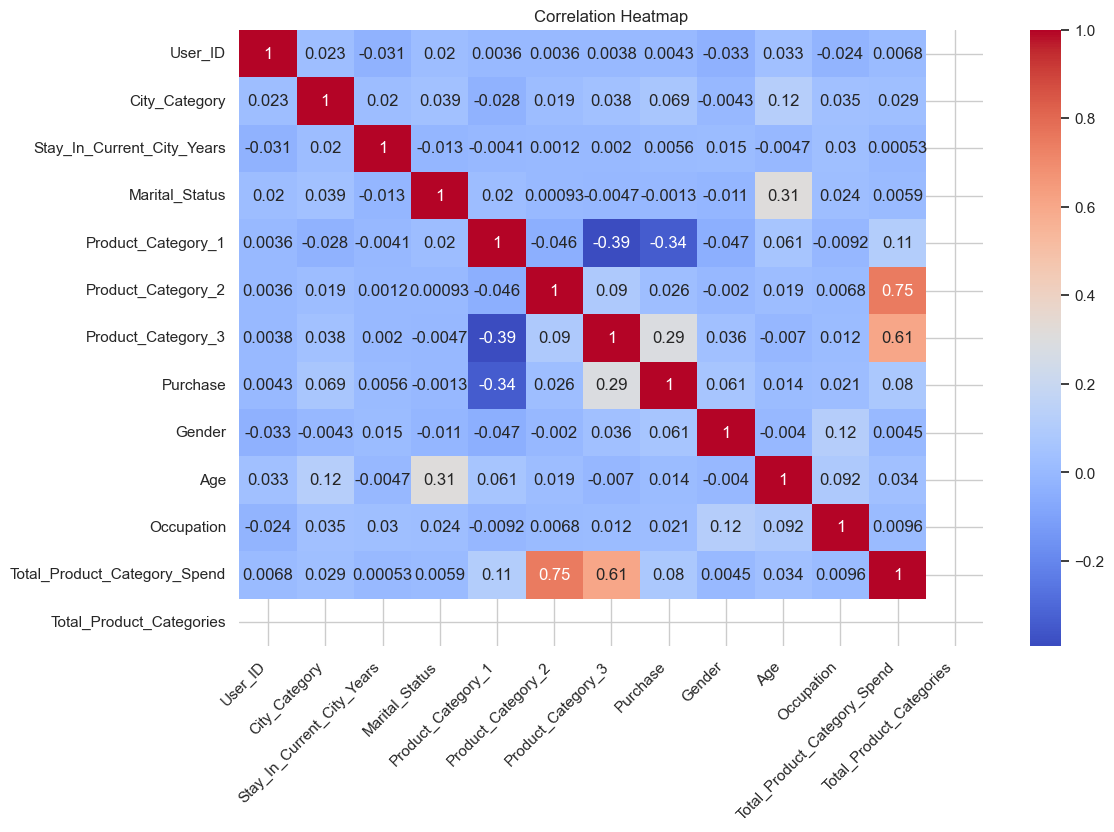

In [150]:
# Multivariate analysis: Correlation Heatmap
# Select only the numeric columns
numeric_columns = df_cleaned.select_dtypes(include=[np.number])
# Compute the correlation matrix
corr = numeric_columns.corr()
# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.show()

In [152]:
df_cleaned.dtypes

User_ID                            int64
Product_ID                        object
City_Category                      int32
Stay_In_Current_City_Years         int32
Marital_Status                     int64
Product_Category_1               float64
Product_Category_2               float64
Product_Category_3               float64
Purchase                         float64
Gender                             int32
Age                                int32
Occupation                         int64
Total_Product_Category_Spend       int64
Total_Product_Categories           int64
Customer_Segment                category
dtype: object

In [154]:
# Encoding Categorical Variables
# One-hot encode 'City_Category' and 'Gender'
df_cleaned = pd.get_dummies(df_cleaned, columns=['City_Category', 'Gender', 'Customer_Segment'], drop_first=True)

# Scaling Features
scaler = StandardScaler()
df_cleaned[['Purchase', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Total_Product_Categories']] = scaler.fit_transform(
    df_cleaned[['Purchase', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Total_Product_Categories']]
)

# Drop Unused Features
df_cleaned.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)
# Display the transformed DataFrame
print(df_cleaned.head())

   Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                           2               0           -0.607161   
1                           2               0           -1.142077   
2                           2               0            1.799959   
3                           2               0            1.799959   
4                           4               0            0.730128   

   Product_Category_2  Product_Category_3  Purchase  Age  Occupation  \
0           -1.089735           -0.618181 -0.182652    0          10   
1           -0.122461            1.617351  1.212651    0          10   
2           -1.089735           -0.618181 -1.602061    0          10   
3            1.167237           -0.618181 -1.676626    0          10   
4           -1.089735           -0.618181 -0.264572    6          16   

   Total_Product_Category_Spend  Total_Product_Categories  City_Category_1  \
0                             3                       0.0            False

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [158]:
df_cleaned.columns

Index(['Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Age',
       'Occupation', 'Total_Product_Category_Spend',
       'Total_Product_Categories', 'City_Category_1', 'City_Category_2',
       'Gender_1', 'Customer_Segment_Medium', 'Customer_Segment_High',
       'Customer_Segment_Very High'],
      dtype='object')

In [162]:
# Prepare your features (X) and target (y)
X = df_cleaned[['Age', 'Stay_In_Current_City_Years', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']]
y = df_cleaned['Purchase']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate regression models
def evaluate_regression_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, r2

# Initialize regression models
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=35),
    "Random Forest": RandomForestRegressor(random_state=35),
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    mse, r2 = evaluate_regression_model(model)
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print("=" * 80)

Model: Decision Tree
Mean Squared Error: 0.36
R-squared: 0.64
Model: Random Forest
Mean Squared Error: 0.36
R-squared: 0.64
Model: Linear Regression
Mean Squared Error: 0.86
R-squared: 0.15
Model: Gradient Boosting
Mean Squared Error: 0.37
R-squared: 0.63


### Decision Tree, Random Forest, and Gradient Boosting models perform similarly well, with low MSE(0.36) and moderately high R-squared values(0.64), indicating they are good at predicting the target variable
### However I see that Linear Regression performs significantly worse and it is not as effective for this particular dataset.

In [163]:
from sklearn.model_selection import GridSearchCV

# Define the model
gb_model = GradientBoostingRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best MSE: 0.3608147987835762
